# Global Educational Gaps (code)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Color palette (for consistency purposes)
- Pink - EA6D7C
- Orange - EA7933
- Yellow - EA7933
- Green - A4C332
- Dark Green - 52BA60


# Pre-Processing

In [2]:
def clean_global_education_data():
    # Encoding is latin-1 not utf
    df = pd.read_csv('https://raw.githubusercontent.com/dagonzalezcolme/Educational-Gap-in-US/main/data/Global_Education_raw.csv', encoding='latin-1')

    # Replace 0s with NaNs in all but the first 3 cols
    education_cols = df.columns[3:]
    df[education_cols] = df[education_cols].replace(0, np.nan)

    # Rename columns
    column_mapping = {
        'Countries and areas': 'Country',
        'Latitude ': 'Latitude',
        'Longitude': 'Longitude',
        'OOSR_Pre0Primary_Age_Male': 'OOSR_PrePrimary_Male_Pct',
        'OOSR_Pre0Primary_Age_Female': 'OOSR_PrePrimary_Female_Pct',
        'OOSR_Primary_Age_Male': 'OOSR_Primary_Male_Pct',
        'OOSR_Primary_Age_Female': 'OOSR_Primary_Female_Pct',
        'OOSR_Lower_Secondary_Age_Male': 'OOSR_Lower_Secondary_Male_Pct',
        'OOSR_Lower_Secondary_Age_Female': 'OOSR_Lower_Secondary_Female_Pct',
        'OOSR_Upper_Secondary_Age_Male': 'OOSR_Upper_Secondary_Male_Pct',
        'OOSR_Upper_Secondary_Age_Female': 'OOSR_Upper_Secondary_Female_Pct',
        'Completion_Rate_Primary_Male': 'Completion_Primary_Male_Pct',
        'Completion_Rate_Primary_Female': 'Completion_Primary_Female_Pct',
        'Completion_Rate_Lower_Secondary_Male': 'Completion_Lower_Secondary_Male_Pct',
        'Completion_Rate_Lower_Secondary_Female': 'Completion_Lower_Secondary_Female_Pct',
        'Completion_Rate_Upper_Secondary_Male': 'Completion_Upper_Secondary_Male_Pct',
        'Completion_Rate_Upper_Secondary_Female': 'Completion_Upper_Secondary_Female_Pct',
        'Grade_2_3_Proficiency_Reading': 'Proficiency_Reading_Grade2_3_Pct',
        'Grade_2_3_Proficiency_Math': 'Proficiency_Math_Grade2_3_Pct',
        'Primary_End_Proficiency_Reading': 'Proficiency_Reading_Primary_End_Pct',
        'Primary_End_Proficiency_Math': 'Proficiency_Math_Primary_End_Pct',
        'Lower_Secondary_End_Proficiency_Reading': 'Proficiency_Reading_Lower_Secondary_End_Pct',
        'Lower_Secondary_End_Proficiency_Math': 'Proficiency_Math_Lower_Secondary_End_Pct',
        'Youth_15_24_Literacy_Rate_Male': 'Literacy_Youth_15_24_Male_Pct',
        'Youth_15_24_Literacy_Rate_Female': 'Literacy_Youth_15_24_Female_Pct',
        'Birth_Rate': 'Birth_Rate_Per_1000',
        'Gross_Primary_Education_Enrollment': 'Enrollment_Primary_Gross_Pct',
        'Gross_Tertiary_Education_Enrollment': 'Enrollment_Tertiary_Gross_Pct',
        'Unemployment_Rate': 'Unemployment_Rate_Pct'
    }

    df.rename(columns=column_mapping, inplace=True)

    # Fix corrupted country names from encoding issues
    # The original latin-1 encoding caused issues with special characters
    corrupted_mask = df['Country'].str.contains('ï¿½', na=False)
    if corrupted_mask.any():
        df.loc[corrupted_mask, 'Country'] = 'Sao Tome and Principe'

    # df.to_csv('Global_Education_clean.csv', index=False, encoding='utf-8')

    return df

In [3]:
df_clean = clean_global_education_data()
df_clean.head()

,Country,Latitude,Longitude,OOSR_PrePrimary_Male_Pct,OOSR_PrePrimary_Female_Pct,OOSR_Primary_Male_Pct,OOSR_Primary_Female_Pct,OOSR_Lower_Secondary_Male_Pct,OOSR_Lower_Secondary_Female_Pct,OOSR_Upper_Secondary_Male_Pct,...,Proficiency_Reading_Primary_End_Pct,Proficiency_Math_Primary_End_Pct,Proficiency_Reading_Lower_Secondary_End_Pct,Proficiency_Math_Lower_Secondary_End_Pct,Literacy_Youth_15_24_Male_Pct,Literacy_Youth_15_24_Female_Pct,Birth_Rate_Per_1000,Enrollment_Primary_Gross_Pct,Enrollment_Tertiary_Gross_Pct,Unemployment_Rate_Pct
0,Afghanistan,33.939110,67.709953,NaN,NaN,NaN,NaN,NaN,NaN,44.0,...,13.0,11.0,NaN,NaN,74.0,56.0,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,...,NaN,NaN,48.0,58.0,99.0,100.0,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,19.0,98.0,97.0,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.20,106.4,NaN,NaN
4,Angola,11.202692,17.873887,31.0,39.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.73,113.5,9.3,6.89


In [4]:
# Calculate missing data percentage
education_cols_new = df_clean.columns[3:]
remaining_zeros = (df_clean[education_cols_new] == 0).sum().sum()
total_cells = df_clean[education_cols_new].size
missing_cells = df_clean[education_cols_new].isna().sum().sum()
missing_pct = (missing_cells / total_cells) * 100

In [5]:
print(f"Countries: {len(df_clean)}\n")
print(f"Missing Data Rate: {missing_pct:.1f}%\n")
print(f"Columns:\n{df_clean.columns}\n")
print(f"Shape:\n{df_clean.shape}")

Countries: 202

Missing Data Rate: 42.3%

Columns:
Index(['Country', 'Latitude', 'Longitude', 'OOSR_PrePrimary_Male_Pct',
       'OOSR_PrePrimary_Female_Pct', 'OOSR_Primary_Male_Pct',
       'OOSR_Primary_Female_Pct', 'OOSR_Lower_Secondary_Male_Pct',
       'OOSR_Lower_Secondary_Female_Pct', 'OOSR_Upper_Secondary_Male_Pct',
       'OOSR_Upper_Secondary_Female_Pct', 'Completion_Primary_Male_Pct',
       'Completion_Primary_Female_Pct', 'Completion_Lower_Secondary_Male_Pct',
       'Completion_Lower_Secondary_Female_Pct',
       'Completion_Upper_Secondary_Male_Pct',
       'Completion_Upper_Secondary_Female_Pct',
       'Proficiency_Reading_Grade2_3_Pct', 'Proficiency_Math_Grade2_3_Pct',
       'Proficiency_Reading_Primary_End_Pct',
       'Proficiency_Math_Primary_End_Pct',
       'Proficiency_Reading_Lower_Secondary_End_Pct',
       'Proficiency_Math_Lower_Secondary_End_Pct',
       'Literacy_Youth_15_24_Male_Pct', 'Literacy_Youth_15_24_Female_Pct',
       'Birth_Rate_Per_1000', 'Enro

In [6]:
df = df_clean.copy()
df = df.rename(columns={"Country": "ADMIN"})

# Part 1: Visual

**Where do the most significant educational disparities happen across genders, and regions worldwide?**

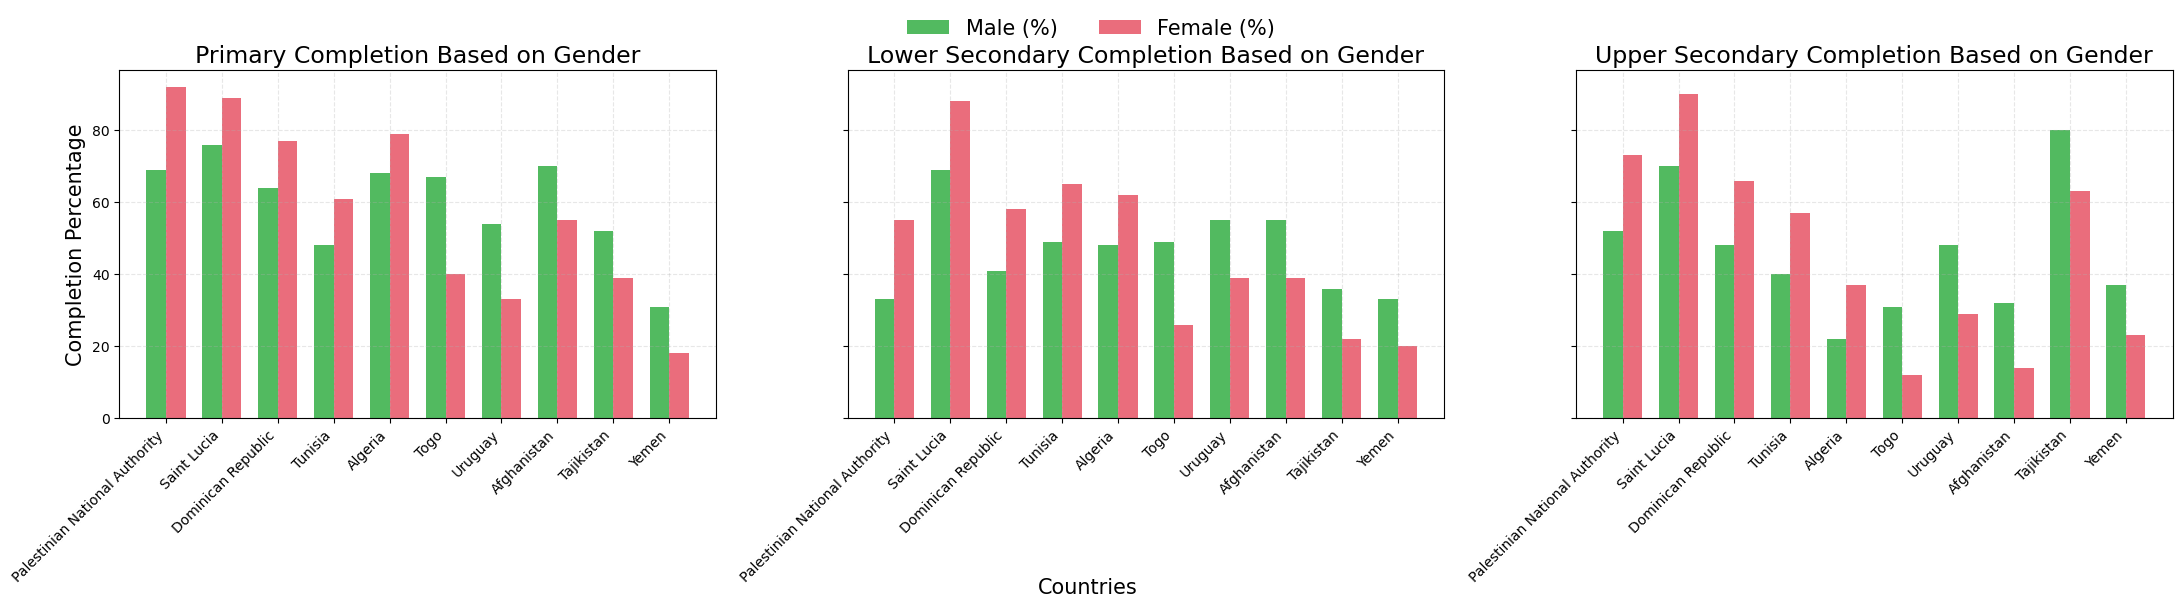

In [7]:
colors = {'Male': '#52BA60', 'Female': '#EA6D7C'}

gap_columns = [
    ('Primary_Gender_Gap', 'Primary Completion Based on Gender'),
    ('LowerSec_Gender_Gap', 'Lower Secondary Completion Based on Gender'),
    ('UpperSec_Gender_Gap', 'Upper Secondary Completion Based on Gender')
]

# map gap column to the actual male/female percentage columns
gender_cols_map = {
    'Primary_Gender_Gap': ('Completion_Primary_Male_Pct', 'Completion_Primary_Female_Pct'),
    'LowerSec_Gender_Gap': ('Completion_Lower_Secondary_Male_Pct', 'Completion_Lower_Secondary_Female_Pct'),
    'UpperSec_Gender_Gap': ('Completion_Upper_Secondary_Male_Pct', 'Completion_Upper_Secondary_Female_Pct')
}

# creates a single figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True, sharex=True)

for ax, (gap_col, title) in zip(axes, gap_columns):
    male_col, female_col = gender_cols_map[gap_col]

    # dropping missing data and set 'ADMIN' as index (previously 'Country')
    df_plot = df[['ADMIN', male_col, female_col]].dropna().set_index('ADMIN')

    # computing gap to select extremes
    df_plot['Gap'] = df_plot[male_col] - df_plot[female_col]

    best_5 = df_plot.nsmallest(5, 'Gap')   # female advantage
    worst_5 = df_plot.nlargest(5, 'Gap')   # male advantage
    combined = pd.concat([best_5, worst_5])

    n = len(combined)
    ind = np.arange(n)
    width = 0.35

    # Grouped bar chart
    ax.bar(ind - width/2, combined[male_col], width, color=colors['Male'], label='Male (%)')
    ax.bar(ind + width/2, combined[female_col], width, color=colors['Female'], label='Female (%)')

    # labels, ticks, title
    ax.set_xticks(ind)
    ax.set_xticklabels(combined.index, rotation=45, ha='right')
    ax.set_title(title, size=17)
    ax.grid(True, linestyle='--', alpha=0.3)

# yaxis label for the first subplot only
axes[0].set_ylabel("Completion Percentage", size=15)
fig.text(0.5, 0.01, 'Countries', ha='center', fontsize=15)

fig.legend(['Male (%)', 'Female (%)'], loc='upper center', ncol=2, frameon=False, fontsize=15)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the legend

plt.savefig("images_visuals/Gender_Gap_Education____part1.png", dpi=300)
plt.show()

# Part 2: Visual

**How effective are the current policies in regions based on the current educational completion rates?**

In [8]:
completion_cols = [
    'Completion_Primary_Male_Pct',
    'Completion_Primary_Female_Pct',
    'Completion_Lower_Secondary_Male_Pct',
    'Completion_Lower_Secondary_Female_Pct',
    'Completion_Upper_Secondary_Male_Pct',
    'Completion_Upper_Secondary_Female_Pct'
]

df['Avg_Completion'] = df[completion_cols].mean(axis=1)

print(df[['ADMIN', 'Avg_Completion']].head())

         ADMIN  Avg_Completion
0  Afghanistan       38.000000
1      Albania       90.166667
2      Algeria       59.833333
3      Andorra             NaN
4       Angola       38.833333


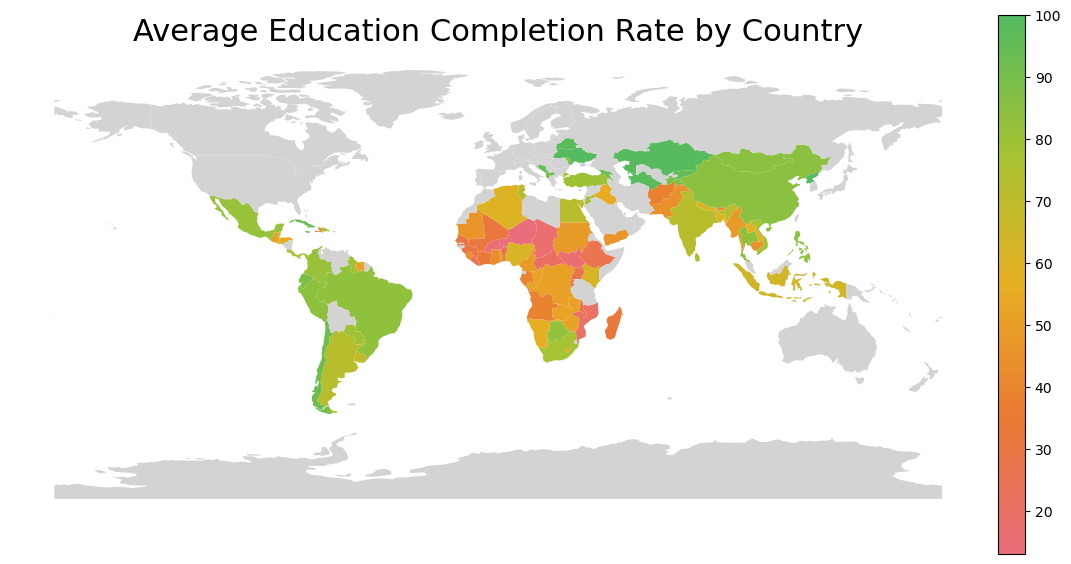

In [9]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

# Define the world variable by loading the geographical data
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# dropping countries with missing completion data
df_plot_gpd = df.dropna(subset=['Avg_Completion', 'ADMIN']).copy()

# uses color palete to color scale
cmap_colors = ['#EA6D7C', '#EA7933', '#E7AF22', '#A4C332', '#52BA60']
cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

# Merges with world map using df_plot_gpd
merged_gpd = world.merge(df_plot_gpd, how="left", on="ADMIN")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged_gpd.plot(
    column="Avg_Completion",
    ax=ax,
    cmap=cmap,
    legend=True,
    legend_kwds={'orientation': "vertical", 'shrink': 0.7, 'pad': 0.01},
    missing_kwds={'color': 'lightgrey', 'label': 'No Data'}
)
ax.set_title("Average Education Completion Rate by Country", fontsize=22)
ax.axis("off")
plt.savefig("images_visuals/Average_Education_Completion_Rate_____part2_map.png", dpi=300)
plt.show()

In [10]:
import matplotlib.patches as patches

def draw_person_icon(ax, x, y, color, fill_percentage, icon_width=0.8, icon_height=1.5):
    head_radius = icon_width * 0.35  # head radius proportional to icon width
    head_center_x = x + icon_width / 2
    head_center_y = y + icon_height - head_radius  # Head placed at the top
    # body dimensions and position
    body_base_width = icon_width * 0.7  # Body narrower than icon width
    body_height = icon_height - (2 * head_radius) - (icon_height * 0.05)
    body_bottom_left_x = x + (icon_width - body_base_width) / 2
    body_bottom_left_y = y  # body starts from the bottom of the bounding box

    # background parts of the person representation
    ax.add_patch(patches.Circle((head_center_x, head_center_y),
                                head_radius, #head size/radius
                                color='#333333',
                                zorder=1))
    ax.add_patch(patches.Rectangle((body_bottom_left_x, body_bottom_left_y),
                                   body_base_width, #body base width
                                   body_height, # body height
                                   color='#333333',
                                   zorder=1))

  # draws percentage of the person representation
    if fill_percentage > 0:
        ax.add_patch(patches.Circle((head_center_x, head_center_y),
                                    head_radius,
                                    color=color,
                                    zorder=2))

        filled_body_width = body_base_width * fill_percentage
        ax.add_patch(patches.Rectangle((body_bottom_left_x, body_bottom_left_y),
                                       filled_body_width,
                                       body_height,
                                       color=color,
                                       zorder=2))

    ax.set_aspect('equal', adjustable='box')

In [11]:
df_avg_completion = df.dropna(subset=['Avg_Completion', 'ADMIN'])

top_5_best = df_avg_completion.nlargest(5, 'Avg_Completion').sort_values(by='Avg_Completion', ascending=False)
top_5_worst = df_avg_completion.nsmallest(5, 'Avg_Completion').sort_values(by='Avg_Completion', ascending=False)

top_5_best['Category'] = 'Best'
top_5_worst['Category'] = 'Worst'

combined_df = pd.concat([top_5_best, top_5_worst])
df_pictogram = combined_df[['ADMIN', 'Avg_Completion', 'Category']]
print(df_pictogram.head())

            ADMIN  Avg_Completion Category
48    North Korea      100.000000     Best
189       Ukraine       98.833333     Best
91     Kazakhstan       98.500000     Best
185  Turkmenistan       97.833333     Best
16        Belarus       97.500000     Best


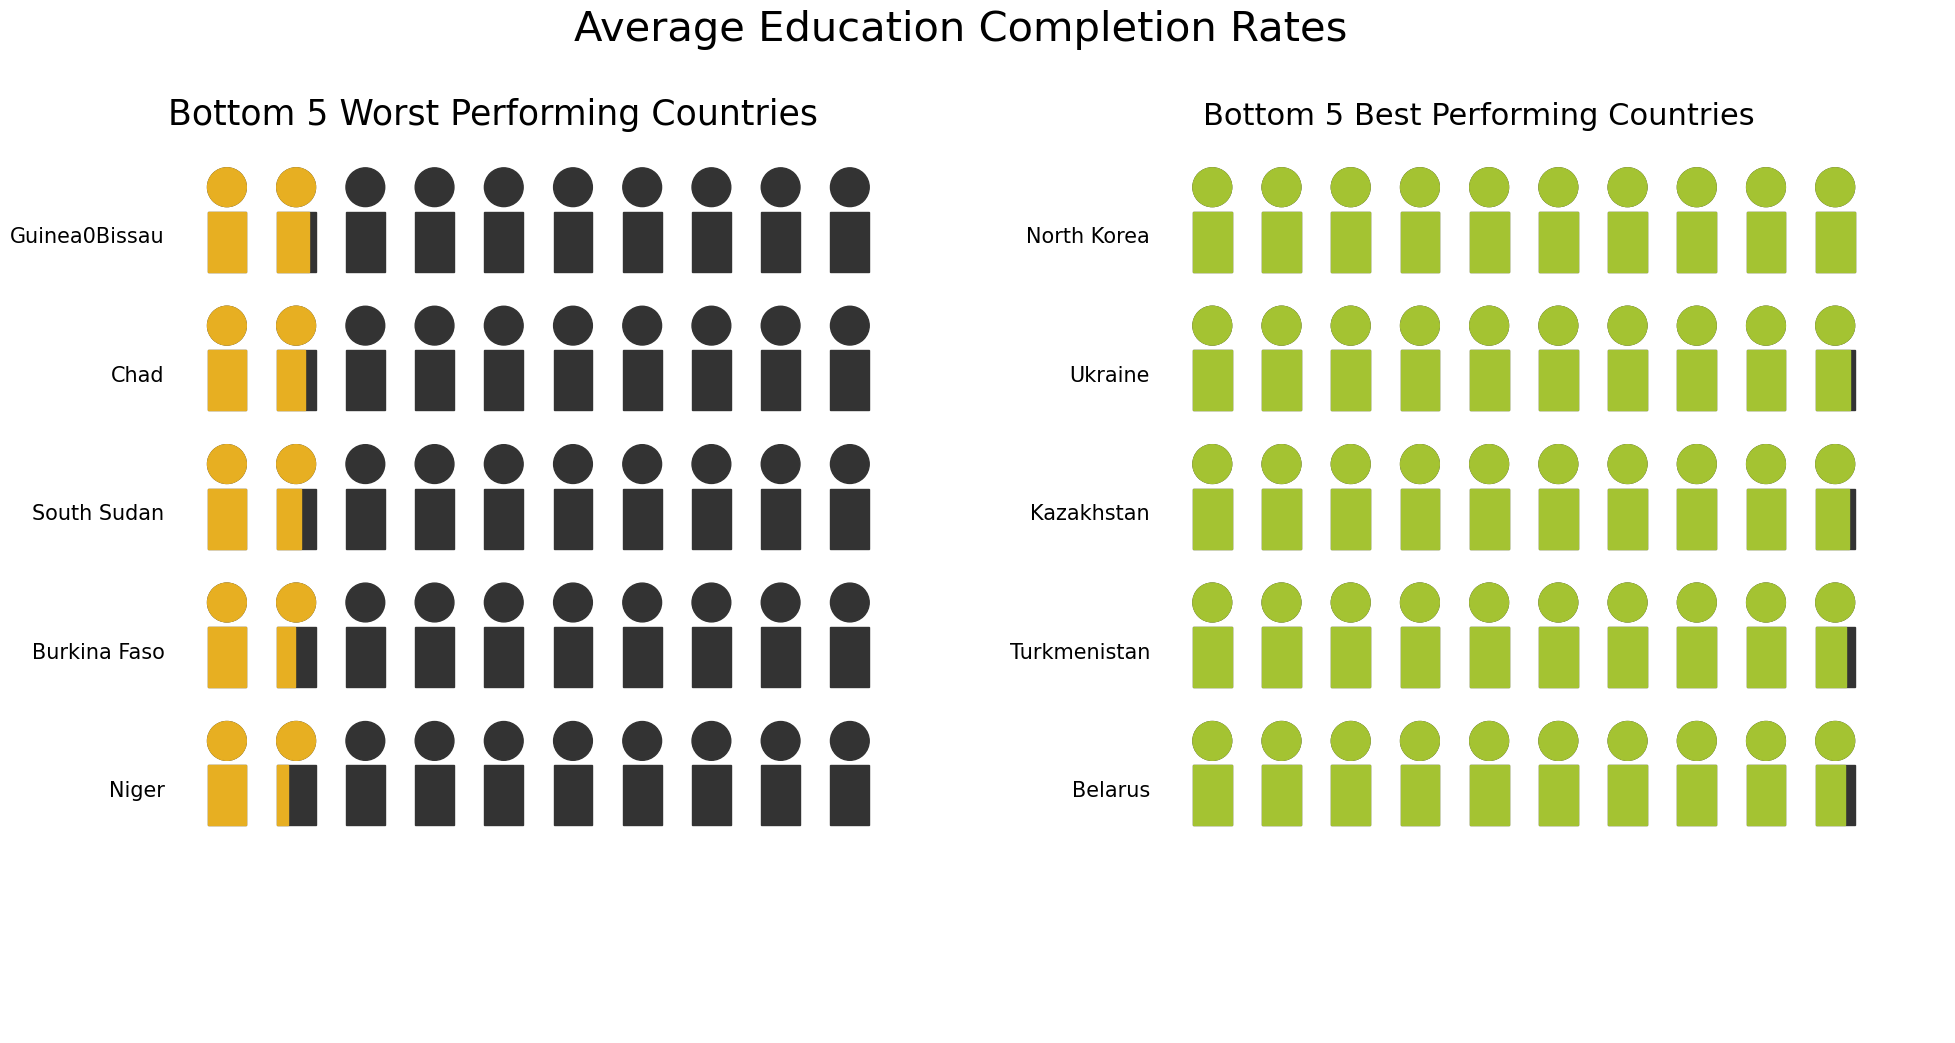

In [12]:
# colors
palette = {'Best': '#A4C332', 'Worst': '#E7AF22'}

fig, axes = plt.subplots(1, 2, figsize=(20, 12)) # 2 columnst

df_pictogram_worst = df_pictogram[df_pictogram['Category'] == 'Worst'].reset_index(drop=True)
df_pictogram_best = df_pictogram[df_pictogram['Category'] == 'Best'].reset_index(drop=True)

# icon placement
icons_per_row = 10
icon_spacing_x = 1.0
icon_spacing_y = 2.0
start_x = 0
start_y = 0
icon_height = 1.5
max_completion_val = 100

# top 5 averages ed Countries (highest/lowest)
i =0
for i in range(2):
  if (i==0):
    df_country = df_pictogram_worst.copy()
  if (i==1):
    df_country = df_pictogram_best.copy()

  for idx, row in df_country.iterrows():
      country = row['ADMIN']
      completion_rate = row['Avg_Completion']
      category = row['Category']
      color = palette[category]

      num_full_icons = int(completion_rate // 10)
      partial_fill_percentage = (completion_rate % 10) / 10

      current_y = start_y - (idx * icon_spacing_y)

      # draws the person
      for j in range(num_full_icons):
          draw_person_icon(axes[i], start_x + j * icon_spacing_x, current_y, color, 1.0)

      # Draw the partial icon if needed
      num_colored_icons = num_full_icons
      if partial_fill_percentage > 0:
          draw_person_icon(axes[i], start_x + num_full_icons * icon_spacing_x, current_y, color, partial_fill_percentage)
          num_colored_icons += 1

      # Draw remaining icons in grey
      for j in range(num_colored_icons, icons_per_row):
          draw_person_icon(axes[i], start_x + j * icon_spacing_x, current_y, color, 0.0) # 0.0 for unfilled (grey) icon

      axes[i].text(start_x - icon_spacing_x * 0.5, current_y + 0.5, country, va='center', ha='right', fontsize=15)

  i= i+1 # incrementing for loop

# updating ordering and graph creating
axes[0].set_xlim(start_x - icon_spacing_x * 0.5 - 2, start_x + icons_per_row * icon_spacing_x + 1)
axes[0].set_ylim(start_y - len(df_country) * icon_spacing_y - 1, start_y + icon_height + 0.5)
axes[0].axis('off')
axes[0].set_title('Bottom 5 Worst Performing Countries', fontsize=25, loc='center')
axes[1].set_xlim(start_x - icon_spacing_x * 0.5 - 2, start_x + icons_per_row * icon_spacing_x + 1)
axes[1].set_ylim(start_y - len(df_country) * icon_spacing_y - 1, start_y + icon_height + 0.5) # Adjusted upper limit
axes[1].axis('off')
axes[1].set_title('Bottom 5 Best Performing Countries', fontsize=22,loc='center')


# Add a common title for the entire figure
fig.suptitle('Average Education Completion Rates', fontsize=30, y=0.98)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig("images_visuals/Average_Education_Completion_Rates____part2_pictogram.png", dpi=300)
plt.show()

# Part 3: Visual

**Are there regional clusters or hotspots where education indicators are consistently higher or lower?**

Static global maps showing different education indicators per region:

*   OOSR_Primary_Age_Male - early education access
* Primary_End_Proficiency_Math - foundational math levels

*   Youth_15_24_Literacy_Rate_Female - long-term literacy levels

In [13]:
#List of indicators
indicators = [
    'OOSR_Primary_Male_Pct',
    'Proficiency_Math_Primary_End_Pct',
    'Literacy_Youth_15_24_Female_Pct'
]

# custom colors from palette for subplots
colors = ['#EA6D7C', '#EA7933', '#E7AF22', '#A4C332', '#52BA60']


In [14]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
df = df.rename(columns={"Country": "ADMIN"})

In [15]:
#checking country names that don't match geopandas ADMIN names
mismatched = set(df["ADMIN"]) - set(world["ADMIN"])
print(mismatched)

{'Malta', 'Saint Kitts and Nevis', 'Turks and Caicos Islands', 'Maldives', 'Grenada', 'Guinea0Bissau', 'Singapore', 'Bahrain', 'United States', 'Cape Verde', 'San Marino', 'Kiribati', 'Liechtenstein', 'Saint Vincent and the Grenadines', 'Dominica', 'Samoa', 'Federated States of Micronesia', 'Comoros', 'Montserrat', 'Niue', 'Mauritius', 'The Gambia', 'Seychelles', 'Cook Islands', 'Sao Tome and Principe', 'Palau', 'Saint Lucia', 'Marshall Islands', 'Tanzania', 'Eswatini', 'Monaco', 'Tokelau', 'Republic of Ireland', 'Tonga', 'Serbia', 'Antigua and Barbuda', 'British Virgin Islands', 'Barbados', 'Anguilla', 'Palestinian National Authority', 'Vatican City', 'Tuvalu', 'Nauru', 'Czech Republic', 'Andorra'}


In [16]:
# @title

# Renamed countries to match geopandas world map names
rename_dict = {
    "United States": "United States of America",
    "Czech Republic": "Czechia",
    "Cape Verde": "Cabo Verde",
    "The Gambia": "Gambia",
    "Republic of Ireland": "Ireland",
    "Guinea0Bissau": "Guinea-Bissau",
    "Palestinian National Authority": "Palestine",
    "Sao Tome and Principe": "Sao Tome and Principe",  # check accents if needed
    "Eswatini": "Swaziland",
    "Vatican City": "Holy See",
    "Federated States of Micronesia": "Micronesia",
    "British Virgin Islands": "Virgin Islands",
    "Turks and Caicos Islands": "Turks and Caicos",
    # Small island states often not in Natural Earth low-res
    "Palau": "Palau",
    "Anguilla": "Anguilla",
    "Grenada": "Grenada",
    "Kiribati": "Kiribati",
    "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Marshall Islands": "Marshall Islands",
    "Comoros": "Comoros",
    "Saint Kitts and Nevis": "Saint Kitts and Nevis",
    "Montserrat": "Montserrat",
    "Andorra": "Andorra",
    "Dominica": "Dominica",
    "Barbados": "Barbados",
    "Monaco": "Monaco",
    "Maldives": "Maldives",
    "Mauritius": "Mauritius",
    "Saint Lucia": "Saint Lucia",
    "Tokelau": "Tokelau",
    "Niue": "Niue",
    "Liechtenstein": "Liechtenstein",
    "Tuvalu": "Tuvalu",
    "Tonga": "Tonga",
    "Samoa": "Samoa",
    "Nauru": "Nauru",
    "Bahrain": "Bahrain",
    "Malta": "Malta",
    "Singapore": "Singapore",
}

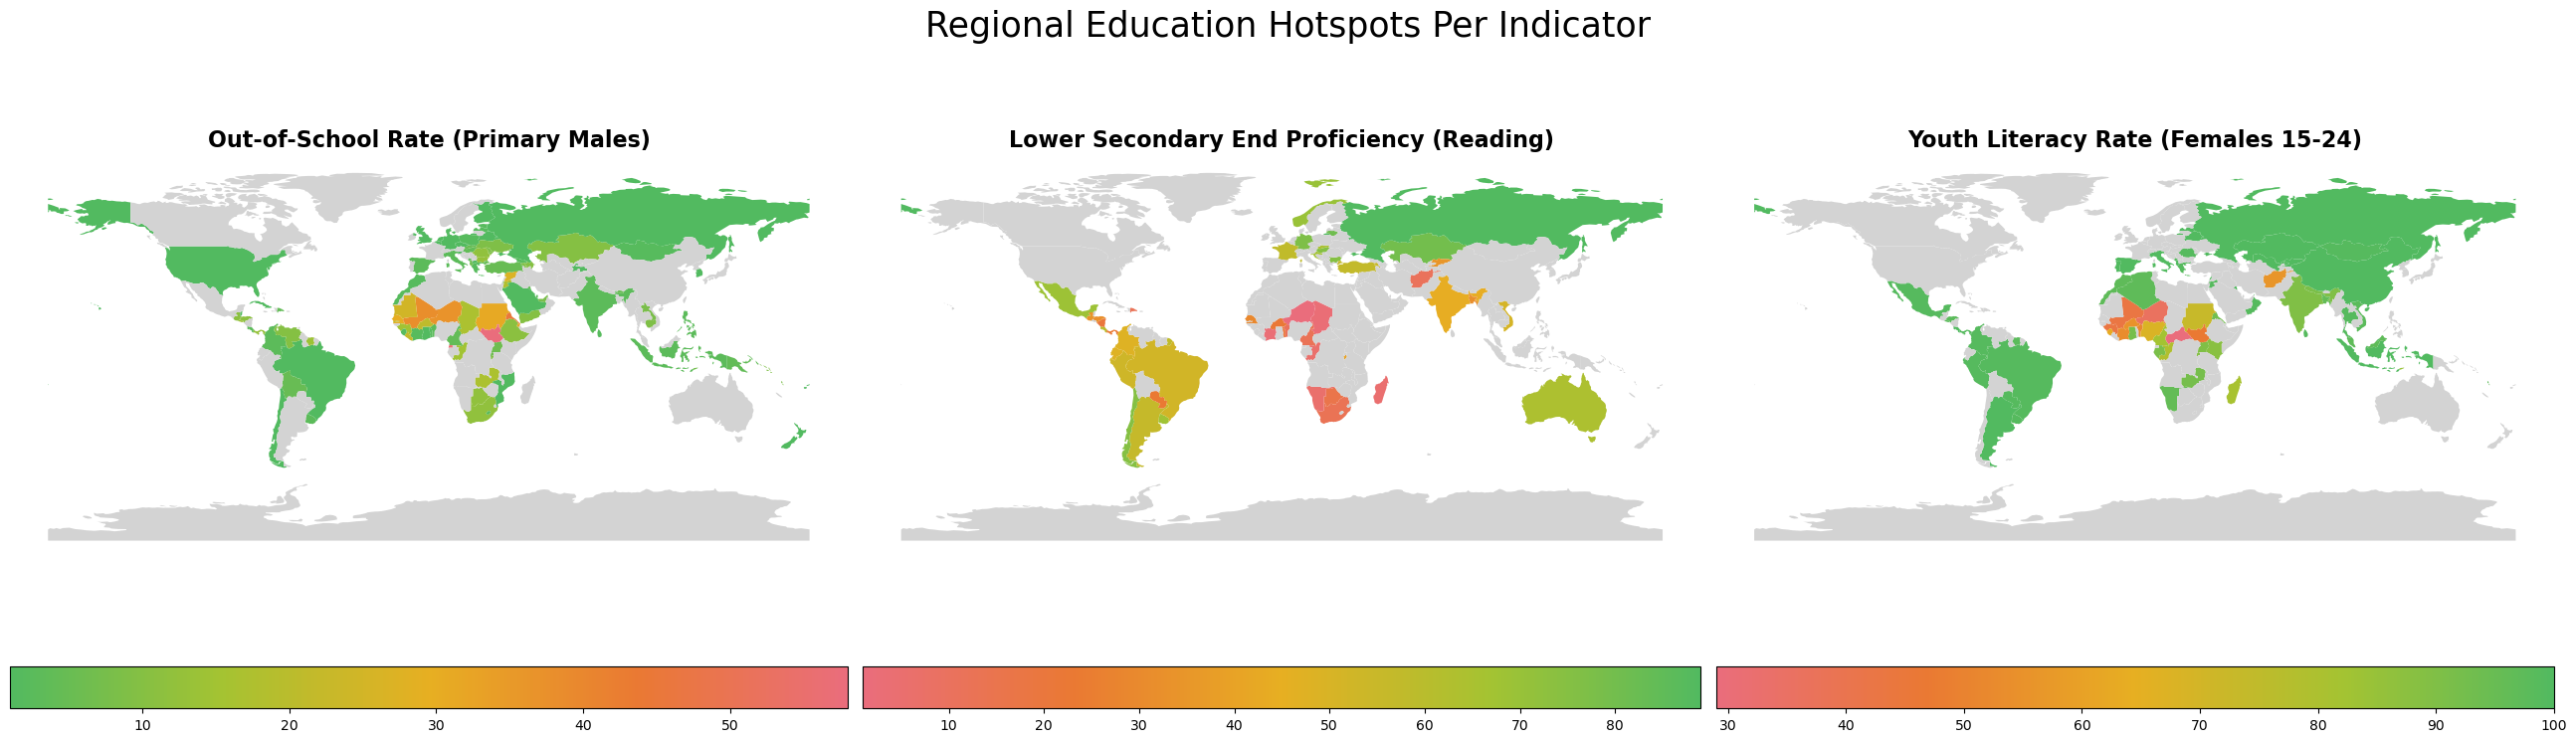

In [17]:
df["ADMIN"] = df["ADMIN"].replace(rename_dict)

#merge with world map
merged = world.merge(df, how="left", on="ADMIN")
#custom color map
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

#plot maps
fig, axes = plt.subplots(1, 3, figsize=(26, 8))
axes = axes.flatten()

#plot titles
custom_titles = [
    "Out-of-School Rate (Primary Males)",
    "Lower Secondary End Proficiency (Reading)",
    "Youth Literacy Rate (Females 15-24)"
]

for i, indicator in enumerate(indicators):
  ax = axes[i]
  #reversing colors for oot-of-school rates so lower rates=green
  if indicator == "OOSR_Primary_Male_Pct":
    current_cmap = cmap.reversed()
  else:
    current_cmap = cmap

  merged.plot(
      column=indicator,
      ax=ax,
      cmap=current_cmap,
      k=5,
      legend=True,
      legend_kwds={"orientation": "horizontal"},
      missing_kwds={'color': 'lightgrey', 'label': 'No Data'}
  )
  ax.set_title(custom_titles[i], fontsize=16, fontweight='bold')
  ax.axis("off")

plt.suptitle("Regional Education Hotspots Per Indicator", fontsize=25)
plt.tight_layout()
plt.savefig("images_visuals/Regional_Education_Hotspots_Indicator___part3_indicators.png", dpi=300)
plt.show()


**Sources**


*   https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
*  https://stackoverflow.com/questions/76548222/how-to-get-maps-in-geopandas-after-datasets-are-removed
*  https://geopandas.org/en/stable/getting_started/introduction.html

